In [131]:
using Revise
using ConvexHullPricing
using Gurobi
using Plots
using BenchmarkTools

In [174]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [6],
    MaxRunCapacity = [16],
    RampUp = [5],
    RampDown = [5],
    StartUp = [6],
    ShutDown = [6],
    UpTime = [1],
    DownTime = [1],
    NoLoadConsumption = [10],
    MarginalCost = [53],
    FixedCost = [30],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 3000,
    Load = [6 11 16 11],
    ThermalGen = ThermalGen
)

LP_Relax = ConvexHullPricing.Utilitaries.LP_Relaxation(instance)
T = length(instance.Load)
N_ITER = 100

100

In [175]:
LP_Relax

4-element Vector{Float64}:
 79.5625
 89.25
 88.0
 86.125

In [158]:
((ItBLM, VBLM, oracle_time, solvetime), runtime) = @timed ConvexHullPricing.Optimizer.tBPM(instance, 127548., LP_Relax, .98, 1e-1)

(value = ([[79.5625, 89.25, 88.0, 86.125], [139.5625, 199.25, 248.0, 196.125], [39.56250000000001, 149.25, 248.0, 146.125], [-10.437499999999993, 99.25, 248.0, 96.125], [-10.437499999999993, 99.25, 248.0, 46.12500000000001]], [-128185.5, -129860.5, -128427.6875, -127763.625, -127548.0], 0.0324649, 0.0007841), time = 0.035751, bytes = 1845376, gctime = 0.0, gcstats = Base.GC_Diff(1845376, 0, 0, 29525, 20, 0, 0, 0, 0))

In [159]:
@show oracle_time
@show solvetime
@show runtime
@show length(ItBLM)

oracle_time = 0.0324649
solvetime = 0.0007841
runtime = 0.035751
length(ItBLM) = 5


5

In [160]:
OptimalBLM, IteratesBLM, ValBLM = ConvexHullPricing.Optimizer.BundleLevelMethod(instance, LP_Relax, N_ITER, .98)

([43.23508809908722, 85.00904504282636, 128.81364657918806, 81.88404504282664], [[79.5625, 89.25, 88.0, 86.125], [81.67160112361717, 93.11668539329807, 93.62426966297903, 89.99168539329807], [77.05441011125995, 90.80808988711945, 93.62426966297903, 87.68308988711942], [74.80041011124577, 89.68108988711234, 93.62426966297903, 86.55608988711234], [75.1721180331038, 90.36255441051861, 94.6154907879336, 87.23755441051864], [72.09188588829558, 88.8224383381145, 94.6154907879336, 85.69743833811452], [72.68024483621087, 89.9010964092925, 96.18444798237434, 86.77609640929253], [70.49666028623965, 88.8093041343069, 96.18444798237434, 85.6843041343069], [71.09446405485949, 89.90527771010991, 97.77859136536051, 86.78027771010991], [68.93196749796313, 88.82402943166176, 97.77859136536051, 85.69902943166176]  …  [48.39404381425902, 88.11673404507445, 122.24959309782963, 84.99173404507474], [48.626602610919306, 88.54309183895, 122.86974988892067, 85.41809183895032], [46.14743162039059, 86.0639208484

In [161]:
OptimalDA, IteratesDA, ValDA = ConvexHullPricing.Optimizer.DAdaptation(instance, LP_Relax, N_ITER, 1e-8)

([79.5625000651361, 89.25000011941623, 88.0000001736963, 86.12500011941621], [[79.5625, 89.25, 88.0, 86.125], [79.56250000259645, 89.25000000476017, 88.00000000692388, 86.12500000476017], [79.56250000367194, 89.2500000067319, 88.00000000979185, 86.1250000067319], [79.5625000044972, 89.25000000824485, 88.00000001199251, 86.12500000824485], [79.5625000051929, 89.25000000952033, 88.00000001384775, 86.12500000952033], [79.56250000580584, 89.25000001064406, 88.00000001548226, 86.12500001064406], [79.56250000635998, 89.25000001165998, 88.00000001695997, 86.12500001165998], [79.56250000686957, 89.25000001259421, 88.00000001831886, 86.12500001259421], [79.56250000734389, 89.25000001346378, 88.00000001958368, 86.12500001346378], [79.56250000787642, 89.25000001444012, 88.0000000210038, 86.12500001444012]  …  [79.56250007295259, 89.25000013374641, 88.00000019454025, 86.12500013374641], [79.56250007745301, 89.25000014199719, 88.00000020654136, 86.12500014199719], [79.56250008219018, 89.25000015068

In [12]:
instance = ConvexHullPricing.Utilitaries.load_data("C:\\Users\\Sofiane\\Desktop\\ConvexHullPricing\\data\\belgian-autumnwd.json")
LP_Relax = ConvexHullPricing.Utilitaries.LP_Relaxation(instance)
T = length(instance.Load)

ArgumentError: ArgumentError: invalid JSON at byte position 1 while parsing type Any: InvalidChar
C:\Users\Sofiane\Desktop\C


In [180]:
OptimalBLM, IteratesBLM, ValBLM = ConvexHullPricing.Optimizer.BundleLevelMethod(instance, LP_Relax, N_ITER, .8)
OptimalDowG, IteratesDowG, ValDowG = ConvexHullPricing.Optimizer.DoWG(instance, LP_Relax, N_ITER, 1.)

([-20.843616339860784, 92.78357501292635, 281.62273826679694, 23.414083385823112], [[79.5625, 89.25, 88.0, 86.125], [79.82214539344474, 89.72601655464871, 88.69238771585266, 86.60101655464871], [80.00574241185338, 90.06261108839787, 89.18197976494234, 86.93761108839787], [79.25457960610528, 89.68702968552383, 89.18197976494234, 86.56202968552383], [79.57060218564418, 90.26640441467846, 90.02470664371272, 87.14140441467846], [78.59403638215768, 89.77812151293521, 90.02470664371272, 86.65312151293521], [79.02765290393816, 90.57308513619942, 91.18101736846066, 87.44808513619942], [77.59064113344294, 89.85457925095182, 91.18101736846066, 86.72957925095182], [76.220778351266, 89.16964785986335, 91.18101736846066, 86.04464785986335], [77.06436088451787, 90.71621583749175, 93.43057079046561, 87.59121583749175]  …  [-20.843616339860784, 92.78357501292635, 281.62273826679694, 23.414083385823112], [-20.843616339860784, 92.78357501292635, 281.62273826679694, 23.414083385823112], [-20.843616339860

In [177]:
OptimalBPM, IteratesBPM, ValBPM = ConvexHullPricing.Optimizer.BundleProximalMethod(instance, LP_Relax, N_ITER, .98, 1e-1)

([-10.437499999999993, 99.25, 248.0, 46.12500000000001], [[79.5625, 89.25, 88.0, 86.125], [139.5625, 199.25, 248.0, 196.125], [39.56250000000001, 149.25, 248.0, 146.125], [-10.437499999999993, 99.25, 248.0, 96.125], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001]  …  [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001], [-10.437499999999993, 99.25, 248.0, 46.12500000000001

In [178]:
OptimalDA, IteratesDA, ValDA = ConvexHullPricing.Optimizer.DAdaptation(instance, LP_Relax, 100, 1e3)

([-44.22421347036978, 125.3955000458207, 297.88000000000005, -19.476977043893932], [[79.5625, 89.25, 88.0, 86.125], [300.0, 300.0, 300.0, 300.0], [-50.0, 300.0, 300.0, 300.0], [-50.0, 125.54770043203138, 300.0, 122.42270043203138], [-50.0, 124.96428571428572, 300.0, -50.0], [-20.716440569731347, 289.80788113946267, 300.0, 119.55131352324378], [-50.0, 121.35806495339678, 300.0, -42.30725981358711], [18.732593532752645, 271.73971940174204, 300.0, 116.53995323362368], [-50.0, 118.66176470588235, 300.0, -31.522058823529406], [-50.0, 118.66176470588235, 300.0, -31.522058823529406]  …  [-50.0, 118.66176470588235, 300.0, -31.522058823529406], [-50.0, 118.66176470588235, 300.0, -31.522058823529406], [-50.0, 118.66176470588235, 300.0, -31.522058823529406], [-50.0, 118.66176470588235, 300.0, -31.522058823529406], [-50.0, 118.66176470588235, 300.0, -31.522058823529406], [-50.0, 118.66176470588235, 300.0, -31.522058823529406], [-50.0, 118.66176470588235, 300.0, -31.522058823529406], [-50.0, 118.66

In [216]:
OptimalCG, IteratesCG = ConvexHullPricing.Optimizer.ColumnGeneration(instance, N_ITER, 1e-5)
ValCG = []
for price in IteratesCG 
    push!(ValCG, ConvexHullPricing.Utilitaries.fast_oracle(instance, price)[1])
end

In [217]:
println("BLM : $(last(ValBLM))")
println("BPM : $(last(ValBPM))")
println("DowG : $(last(ValDowG))")
println("DAdapt : $(last(ValDA))")
println("OGM : $(last(ValOGM))")
println("CG : $(last(ValCG))")

BLM : -127548.0
BPM : -127548.0
DowG : -127548.0
DAdapt : -127547.99999999999
OGM : -127604.31185790148
CG : -127548.0


In [196]:
mu = .1
OptimalOGM, IteratesOGM, ValOGM = ConvexHullPricing.Optimizer.OptimizedGradientMethod(instance, LP_Relax, N_ITER, mu)

ValOGM = []
for price in IteratesOGM
    push!(ValOGM, ConvexHullPricing.Utilitaries.fast_oracle(instance, price)[1])
end

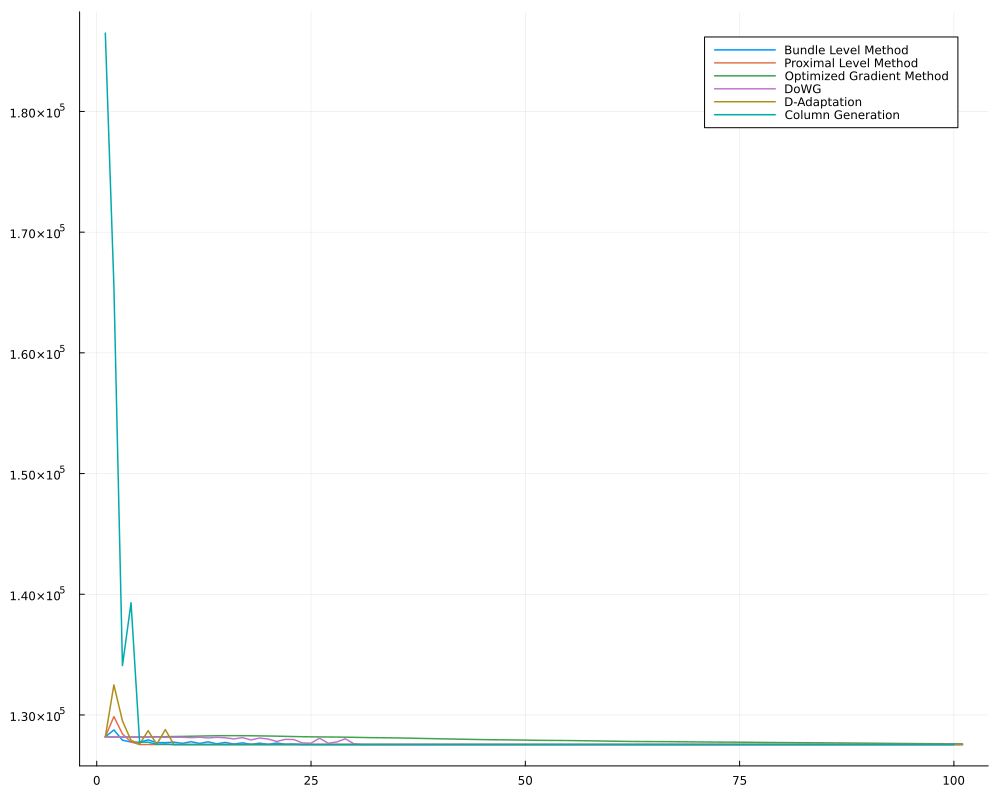

In [218]:
# hline([-850], label = "Optimal Value", linewidth = 1.5)
plot(-ValBLM, label = "Bundle Level Method", linewidth = 1.5)
plot!(-ValBPM, label = "Proximal Level Method", linewidth = 1.5)
plot!(-ValOGM, label = "Optimized Gradient Method", linewidth = 1.5)
plot!(-ValDowG, label = "DoWG", linewidth = 1.5)
plot!(-ValDA, label = "D-Adaptation", linewidth = 1.5)
plot!(-ValCG, label = "Column Generation", linewidth = 1.5)
plot!(size = (1000, 800))